In [392]:
# @title
from IPython.display import display, HTML

display(HTML('''
<div style="text-align: center;">
    <img src="https://i.ytimg.com/vi/vtegCXjxwUg/maxresdefault.jpg" width="750">
</div>
'''))

##Titanic Survival Prediction

###1️⃣ Load Libraries & Dataset 📂

In [350]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# قراءة الملفات
train = pd.read_csv('/content/train(5).csv')
test = pd.read_csv('/content/test(1).csv')

###2️⃣ Explore the Data 🔍

In [351]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [352]:
train.shape

(891, 12)

In [353]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [354]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [355]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [356]:
train['Survived'].value_counts()

,count
Survived,
0,549
1,342


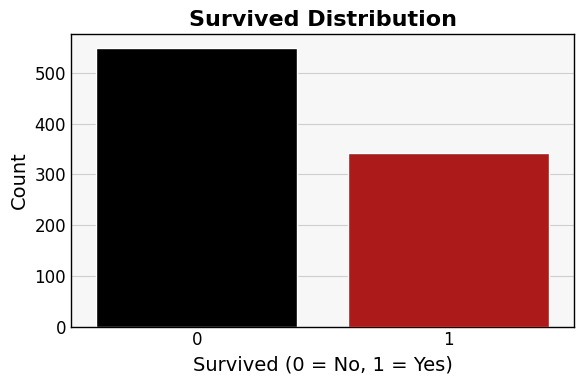

In [357]:
# ⚓ إعداد Theme يشبه صورة Titanic (أسود + أحمر)
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("whitegrid", {
    'axes.facecolor': '#F7F7F7',   # خلفية رمادي فاتح جداً للتاريخ
    'grid.color': '#CFCFCF',
    'axes.edgecolor': '#000000'
})

plt.rc('axes', titlesize=16, titleweight='bold', titlecolor='#000000')
plt.rc('axes', labelsize=14, labelcolor='#000000')
plt.rc('xtick', labelsize=12, color='#000000')
plt.rc('ytick', labelsize=12, color='#000000')

# 🎨 أحمر (ناجين) + أسود (غير ناجين)
palette = ["#000000", "#C40202"]  # الأسود + الأحمر الصارخ

plt.figure(figsize=(6,4))
sns.countplot(
    x='Survived',
    data=train.dropna(subset=['Survived']),
    palette=palette
)
plt.title('Survived Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


###3️⃣ Missing Values Analysis 🧩

In [358]:
round(train.isnull().sum()/train.shape[0]*100,2)

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [359]:
train.drop(train[['Cabin','PassengerId']], axis=1, inplace=True)

In [360]:
train.dropna(subset=['Embarked'], inplace=True)

In [361]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [362]:
# 2️⃣ Extract Title from Name
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'].value_counts()

,count
Title,
Mr,517
Miss,181
Mrs,124
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [363]:
# Merge rare titles
rare_titles = ['Rev','Dr','Col','Major','Mlle','Ms','Mme','Don','Sir','Lady','Capt','Countess','Jonkheer','Dona']
train['Title'] = train['Title'].replace(rare_titles, 'Other')
train['Title'].value_counts()

,count
Title,
Mr,517
Miss,181
Mrs,124
Master,40
Other,27


In [364]:
age_median_train = train.groupby(['Pclass','Sex','Title'])['Age'].median()

def fill_age(row, median_map):
    if pd.isnull(row['Age']):
        return median_map.get((row['Pclass'], row['Sex'], row['Title']), train['Age'].median())
    else:
        return row['Age']

train['Age'] = train.apply(lambda row: fill_age(row, age_median_train), axis=1)

In [365]:
round(train.isnull().sum()/train.shape[0]*100,2)

,0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0
Embarked,0.0


In [366]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = np.where(train['FamilySize'] == 1, 1, 0)
train['FarePerPerson'] = train['Fare'] / train['FamilySize']
train['AgeGroup'] = pd.cut(train['Age'], bins=[0,12,18,35,60,120], labels=['Child','Teen','Adult','Senior','Elder'])

In [367]:
round(test.isnull().sum()/test.shape[0]*100,2)

,0
PassengerId,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,20.57
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.24
Cabin,78.23


In [368]:
test.drop('Cabin', axis=1, inplace=True)

In [369]:
# ✅ استخراج Title من Name (نفس الخطوات)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Title'].replace(rare_titles, 'Other')
test['Title'].value_counts()

,count
Title,
Mr,240
Miss,78
Mrs,72
Master,21
Other,7


In [370]:
# ✅ معالجة Missing Age بنفس خرائط train
test['Age'] = test.apply(lambda row: fill_age(row, age_median_train), axis=1)

In [371]:
test.dropna(subset=['Fare'], inplace=True)

In [372]:
round(test.isnull().sum()/test.shape[0]*100,2)

,0
PassengerId,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0
Embarked,0.0


In [373]:
# ✅ Feature Engineering نفس train
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['IsAlone'] = np.where(test['FamilySize'] == 1, 1, 0)
test['FarePerPerson'] = test['Fare'] / test['FamilySize']
test['AgeGroup'] = pd.cut(test['Age'], bins=[0,12,18,35,60,120],
                          labels=['Child','Teen','Adult','Senior','Elder'])

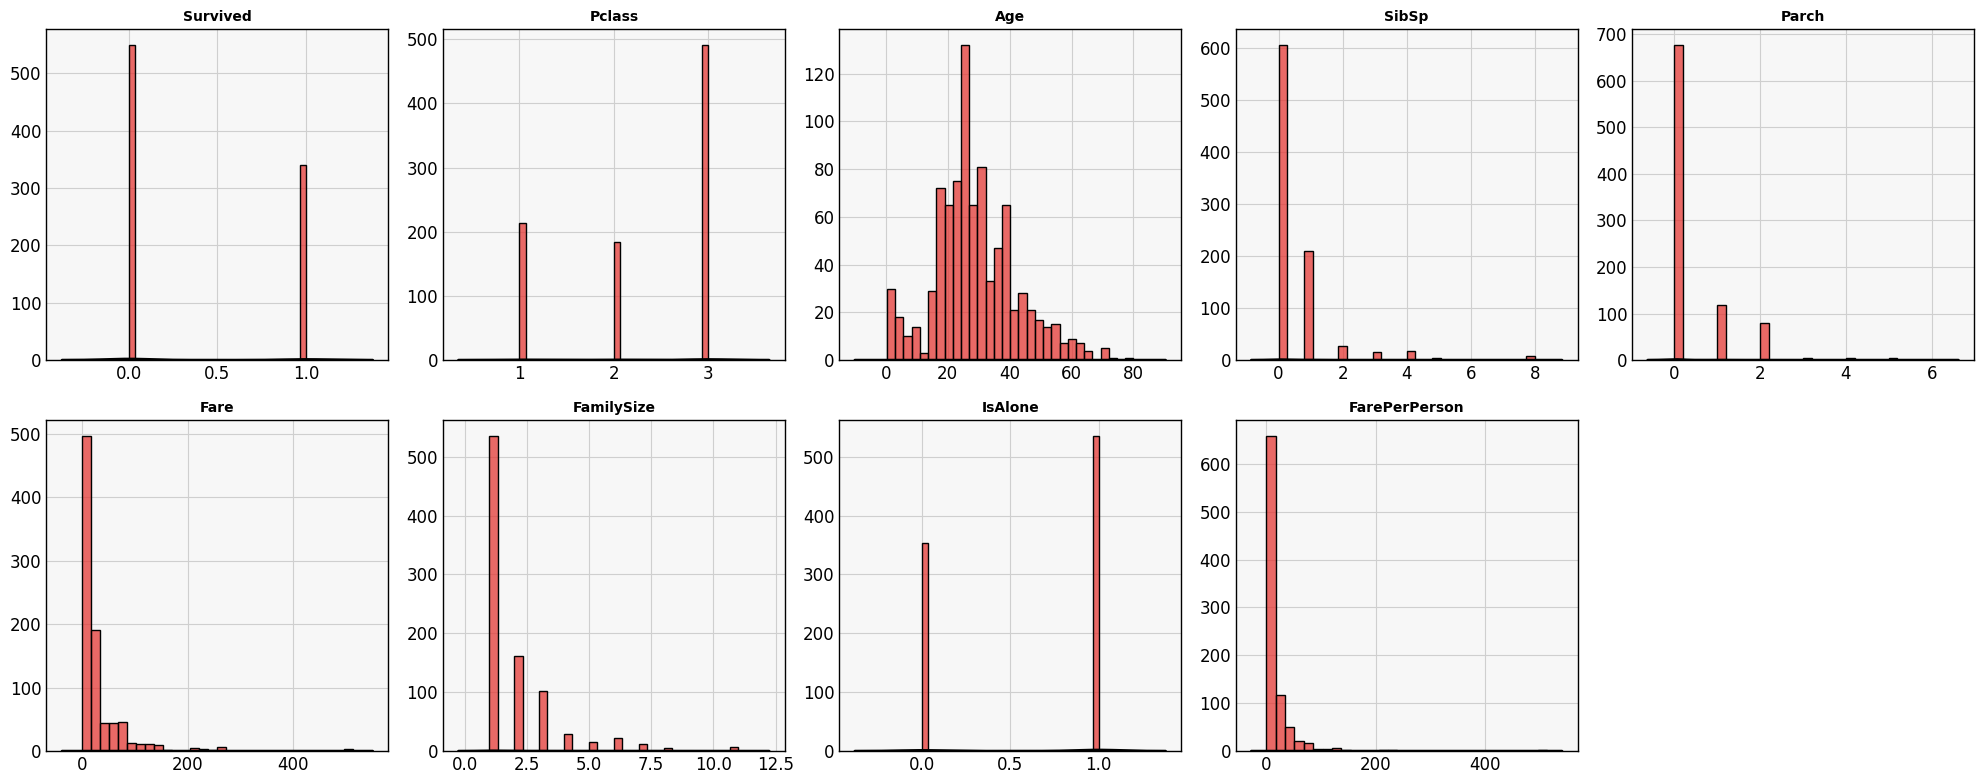

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# اختيار الأعمدة الرقمية فقط
num_features = train.select_dtypes(include=np.number).columns

# إعداد الشكل العام
features_per_row = 5
rows = int(np.ceil(len(num_features)/features_per_row))
plt.figure(figsize=(20, 4*rows))

for i, feature in enumerate(num_features, 1):
    plt.subplot(rows, features_per_row, i)

    # رسم الهيستوجرام بالأحمر مع حواف سوداء
    sns.histplot(
        train[feature],
        bins=30,
        color="#e53935",   # أحمر قوي
        edgecolor='black',  # حواف سوداء
        linewidth=1
    )

    # رسم KDE بالأسود الداكن
    sns.kdeplot(
        train[feature],
        color="black",
        linewidth=2
    )

    plt.title(feature, fontsize=10, fontweight='semibold', color='black')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


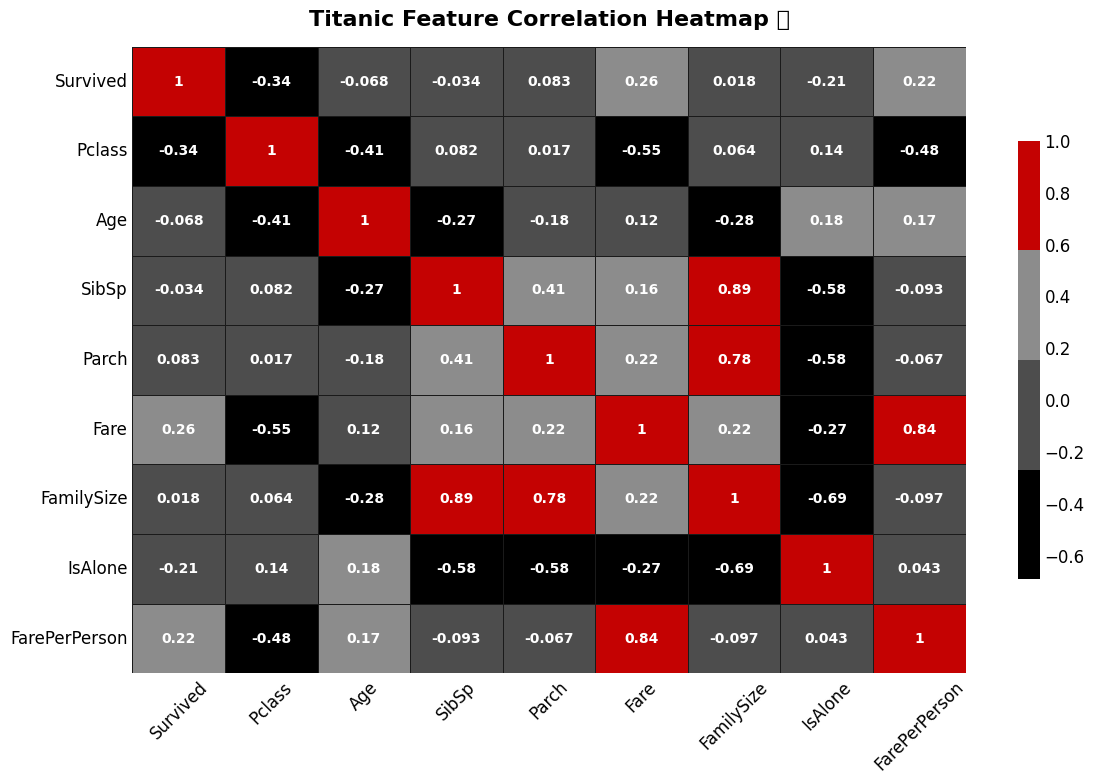

In [375]:
# 💞 Feature Correlation Heatmap | Titanic Style

plt.figure(figsize=(12, 8))

numeric_train = train.select_dtypes(include=np.number)

# 🎨 خريطة ألوان Titanic (أسود → رمادي → أحمر)
cmap = sns.color_palette(
    ["#000000", "#4D4D4D", "#8C8C8C", "#C40202"],
    as_cmap=True
)

sns.heatmap(
    numeric_train.corr(),
    annot=True,
    cmap=cmap,
    linewidths=.5,
    linecolor="#1A1A1A",
    cbar_kws={'shrink': 0.7},
    annot_kws={"color": "white", "size": 10, "weight": "bold"}  # الأرقام بيضاء
)

plt.title('Titanic Feature Correlation Heatmap 🚢', pad=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


###5️⃣ Data Encoding

In [376]:
# Convert categorical columns to dummies
train = pd.get_dummies(train, columns=['AgeGroup', 'Sex','Embarked','Title'], drop_first=True)

In [377]:
# ✅ One-Hot Encoding بنفس drop_first=True مثل train
test = pd.get_dummies(test, columns=['AgeGroup', 'Sex', 'Embarked', 'Title'], drop_first=True)

In [378]:
X_train = train.drop('Survived', axis=1)

missing_cols = set(X_train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0

test = test[X_train.columns]  # ترتيب الأعمدة مثل train


### 6️⃣ Train-Test Split 🎬

In [379]:
from sklearn.model_selection import train_test_split

# Assuming 'train' is your DataFrame and 'Survived' is the target variable
# Drop 'Name' and 'Ticket' as they are not needed for scaling
X = train.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = train['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

###7️⃣ Feature Scaling ⚖️

In [380]:
from sklearn.preprocessing import StandardScaler

# قائمة الأعمدة الرقمية فقط
numeric_cols = ['Pclass','Age','SibSp','Parch','Fare','FamilySize','FarePerPerson']

scaler = StandardScaler()

# ✅ Fit on TRAIN ONLY
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# ✅ Transform on VALIDATION ONLY
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])

# ✅ Transform on TEST ONLY (بعد ما عملنا نفس الأعمدة المطلوبة)
test[numeric_cols] = scaler.transform(test[numeric_cols])


### 8️⃣ Logistic Regression + GridSearchCV 🔬

In [381]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ✅ Split the training data
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# ✅ Logistic Regression model
log_reg = LogisticRegression(max_iter=5000)

# ✅ Hyperparameter search grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'elasticnet'],
    'solver': ['saga'],  # ✅ needed for elasticnet
    'l1_ratio': [0, 0.3, 0.5, 0.7, 1]  # ✅ only affects elasticnet
}

# ✅ GridSearchCV setup
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# ✅ Fit the model
grid_search.fit(X_train_split, y_train_split)

# ✅ Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'C': 100, 'l1_ratio': 0.7, 'penalty': 'elasticnet', 'solver': 'saga'}


### 9️⃣ Cross-Validation 📊

In [382]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(random_state=42, max_iter=5000, class_weight='balanced', C=100, penalty='elasticnet', solver='saga', l1_ratio=.7)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy')
print(f"CV Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

CV Accuracy: 0.830 ± 0.033


In [383]:
# Use the best estimator from GridSearchCV
best_log_reg = grid_search.best_estimator_
best_log_reg.score(X_train, y_train)

0.8368495077355836

In [384]:
best_log_reg.score(X_val, y_val)

0.8461538461538461

In [385]:
# ✅ Training & Testing
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_val)
y_prob = best_model.predict_proba(X_val)[:, 1]

### 🔟 Model Evaluation 🎯

In [386]:
from sklearn.metrics import roc_curve

# Use the best estimator from GridSearchCV
best_log_reg = grid_search.best_estimator_
y_prob = best_log_reg.predict_proba(X_val)[:,1] # Changed to X_test_selected

fpr, tpr, thresholds = roc_curve(y_val, y_prob)

# Youden's J
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print(f"✅ Best Threshold: {best_thresh:.2f}, TPR: {tpr[ix]:.2f}, FPR: {fpr[ix]:.2f}")

✅ Best Threshold: 0.35, TPR: 0.84, FPR: 0.15


In [387]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# تحديد threshold الجديد
threshold = 0.29
y_pred_threshold = (y_prob >= threshold).astype(int)

# حساب الـconfusion matrix و classification report باستخدام threshold الجديد
cm = confusion_matrix(y_val, y_pred_threshold)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_val, y_pred_threshold))

Confusion Matrix:
[[64 21]
 [ 7 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        85
           1       0.71      0.88      0.78        58

    accuracy                           0.80       143
   macro avg       0.80      0.82      0.80       143
weighted avg       0.82      0.80      0.81       143



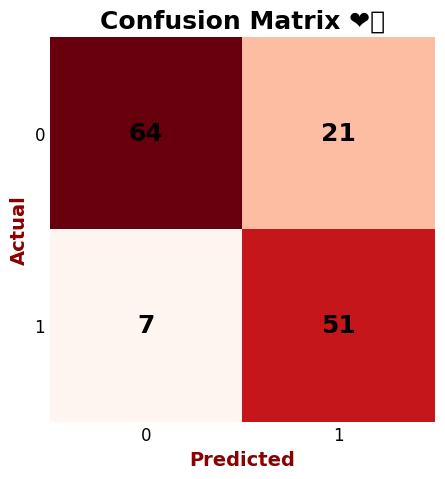

In [388]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6,5))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(
    cmap="Reds",      # درجات الأحمر
    ax=ax,
    colorbar=False,
    values_format='d'  # عرض القيم بدون فاصلة عشرية
)

plt.grid(False)

# تحسين النصوص
for txt in ax.texts:
    txt.set_fontsize(18)
    txt.set_fontweight('bold')
    txt.set_color("black")  # نص أسود واضح

# محاور وألوان العناوين
ax.set_xlabel("Predicted", fontsize=14, fontweight='bold', color='darkred')
ax.set_ylabel("Actual", fontsize=14, fontweight='bold', color='darkred')

# إزالة الإطار
for spine in ax.spines.values():
    spine.set_visible(False)

# تحسين خلفية الشكل
ax.set_facecolor('#f9f9f9')  # خلفية فاتحة قليلاً لتبرز الأحمر

plt.title("Confusion Matrix ❤️🖤", fontsize=18, fontweight="bold", color='black')
plt.show()


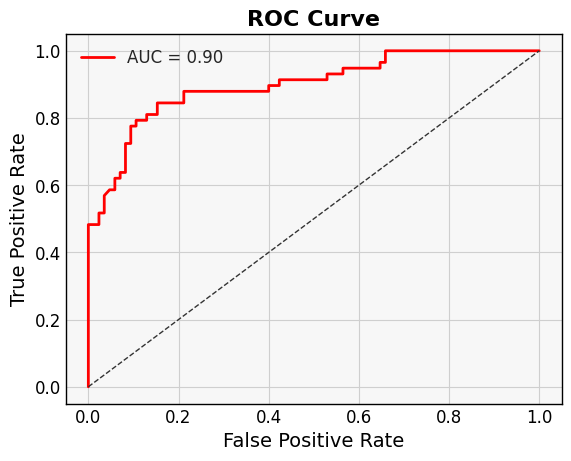

✅ Best Threshold: 0.35, TPR: 0.84, FPR: 0.15


In [389]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# حساب AUC و ROC
auc = roc_auc_score(y_val, y_prob)
fpr, tpr, thresholds = roc_curve(y_val, y_prob)

# اختيار أفضل Threshold (Youden's J)
J = tpr - fpr
best_idx = np.argmax(J)
best_threshold = thresholds[best_idx]

# رسم ROC
plt.plot(fpr, tpr, color='red', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0,1],[0,1], color='0.2', lw=1, linestyle='--')  # خطوط رمادية/أسود فاتح
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"✅ Best Threshold: {best_threshold:.2f}, TPR: {tpr[best_idx]:.2f}, FPR: {fpr[best_idx]:.2f}")


In [390]:
# @title
from IPython.display import display, HTML

display(HTML('''
<div style="text-align: center;">
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/05/20061Titanic.jpg" width="700">
</div>
'''))